# Linear SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Fixing the seed for reproducibility:
seed = 264

## Using a linearly separable dataset

### Load and split dataset

In [2]:
def load_dataset(filename):
    dataset = pd.read_csv(filename, header=None).to_numpy()
    X = dataset[:,:-1].astype(float)
    Y = dataset[:,-1].astype(int)
    (n_samples, n_features) = X.shape

    # Extract test set from entire dataset
    X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=seed)
    # Extract validation set from train_val dataset
    X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.25, shuffle=True, random_state=seed)

    print("Number of features:      ", n_features)
    print("Training dataset size:   ", len(X_train))
    print("Validation dataset size: ", len(X_val))
    print("Test dataset size:       ", len(X_test))
    return  X_train, Y_train, X_val, Y_val, X_test, Y_test


X_train, Y_train, X_val, Y_val, X_test, Y_test = load_dataset("./svm_data_1.csv")

Number of features:       2
Training dataset size:    120
Validation dataset size:  40
Test dataset size:        40


### Visualize dataset

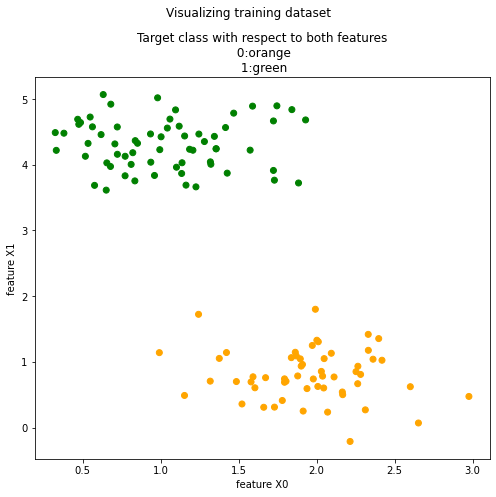

In [3]:
def plot_data(X, Y):
    c = ["orange", "green"]
    fig, ax = plt.subplots(figsize=(7, 7), tight_layout=True)

    ax.scatter( X[:,0], X[:,1], color=np.where(Y, c[0], c[1]) )
    ax.set_xlabel("feature X0")
    ax.set_ylabel("feature X1")
    ax.set_title("Target class with respect to both features\n 0:orange\n 1:green")
    return fig, ax

fig, ax = plot_data(X_train, Y_train)
fig.suptitle("Visualizing training dataset")
plt.show()

### Train a simple SVC

In [4]:
# Fit a simple SVM
model = SVC(C=10e5, kernel="linear")
model.fit(X_train, Y_train)

# Training and validation performance
y_pred = model.predict(X_train)
acc = accuracy_score(Y_train, y_pred)
print("Training accuracy:   ", acc)
y_pred = model.predict(X_val)
acc = accuracy_score(Y_val, y_pred)
print("Validation accuracy: ", acc)

Training accuracy:    1.0
Validation accuracy:  1.0


### Visualize the hyperplanes

Recall that if the feature space is a plane ($\mathcal{R}^2$), then an hyperplane in the feature space is a line. 

SVMs can be used to classify datapoints into 2 different classes. In the lecture, we introduced the maximum margin hyperplane as the separator of those 2 classes, defined by the following equation 
$$\mathbf{w}^T\mathbf{x} + b = 0, \qquad \text{ with } \mathbf{w}, \mathbf{x} \in \mathcal{R}^2 \text{ and } b \in \mathcal{R} $$

where $\mathbf{x}$ is a datapoint in the feature space while $\mathbf{w}$ and $b$ are estimated by the SVM model. In sklearn, a trained SVC model ```model``` has 2 attributes: 
- ```model.coef_``` representing $\mathbf{w}$
- ```model.intercept_``` representing $b$

One way to draw the separator line in our feature space, is to express $x_2$ as a linear function of $x_1$, that is to say $x_2 = a_{sep} \times x_1 + b_{sep}$ where $ a_{sep}$ and $ b_{sep}$ are solutions of the maximum margin hyperplane equation. More specifically:

\begin{align*}
    \mathbf{w}^T\mathbf{x} + b = 0  &\iff w_1 x_1 + w_2 x_2 + b = 0 \\
    &\iff x_2 = -\frac{w_1}{w_2} x_1 - \frac{b}{w_2} \\
    &\iff x_2 = a_{sep} x_1 + b_{sep} \qquad \text{ with } a_{sep} = -\frac{w_1}{w_2}  \text{ and } b_{sep} = - \frac{b}{w_2}
\end{align*}

In the lecture, we also introduced 2 other parallel hyperplanes, the positive and the negative hyperplanes, defined as follows:

$$\mathbf{w}^T\mathbf{x} + b = \pm 1, \qquad \text{ with } \mathbf{w}, \mathbf{x} \in \mathcal{R}^2 \text{ and } b \in \mathcal{R} $$

And showed that the distance between them $D$ (called margin) depends only on $|| \mathbf{w}||$ as follows:

$$ D = \frac{2}{||\mathbf{w}||}$$

We can also draw lines representing the positive and the negative hyperplane similarly to what we did with the maximum margin hyperplane:

\begin{align*}
    \mathbf{w}^T\mathbf{x} + b = \pm 1  &\iff w_1 x_1 + w_2 x_2 + b = \pm 1 \\
    &\iff x_2 = -\frac{w_1}{w_2} x_1 - \frac{b \pm 1}{w_2} \\
    &\iff x_2 = a_{sep} x_1 + b_{sep} \qquad \text{ with } a_{sep} = -\frac{w_1}{w_2}  \text{ and } b_{sep} = - \frac{b \pm 1 }{w_2}
\end{align*}

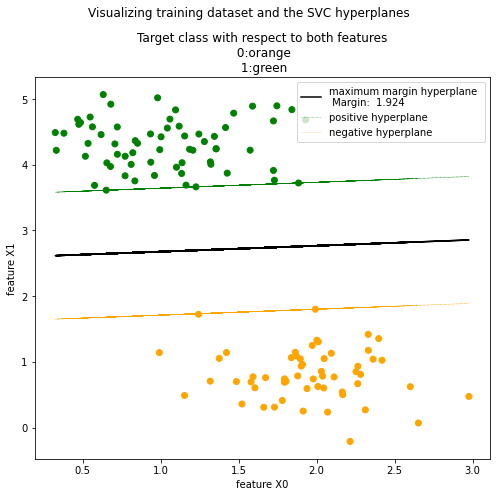

In [5]:
fig, ax = plot_data(X_train, Y_train)

def plot_hyperplanes(model, X_train, ax):
    # Define the 3 lines
    w = model.coef_[0]
    b = model.intercept_[0]
    separator = -w[0]/w[1]*X_train[:, 0] - b/w[1]
    pos = -w[0]/w[1]*X_train[:, 0] - (b+1)/w[1]
    neg = -w[0]/w[1]*X_train[:, 0] - (b-1)/w[1]
    D = 2/np.linalg.norm(w)

    # Plot them
    label = "maximum margin hyperplane \n Margin:  {:.3f}".format(D)
    ax.plot(X_train[:, 0], separator, c="black", label=label)
    ax.plot(X_train[:, 0], pos, c="green", lw=0.5, ls=":", label="positive hyperplane")
    ax.plot(X_train[:, 0], neg, c="orange", lw=0.5, ls=":", label="negative hyperplane")
    ax.legend()
    return ax

ax = plot_hyperplanes(model, X_train, ax)
fig.suptitle("Visualizing training dataset and the SVC hyperplanes")
plt.show()


## Using an “almost” linearly separable dataset

### Load and split dataset

In [6]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = load_dataset("./svm_data_2.csv")

Number of features:       2
Training dataset size:    60
Validation dataset size:  20
Test dataset size:        20


### Visualize dataset

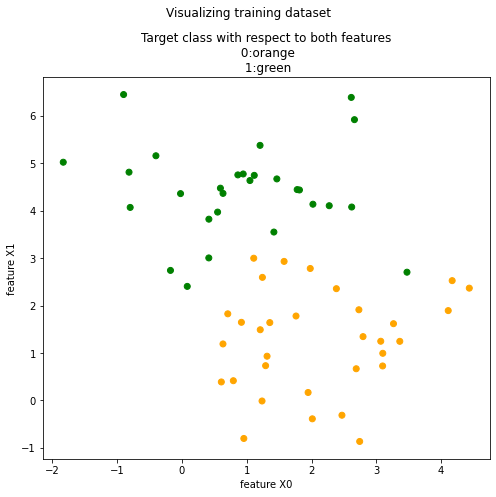

In [7]:
fig, ax = plot_data(X_train, Y_train)
fig.suptitle("Visualizing training dataset")
plt.show()

### Train different SVC models using different values of C

In [8]:
list_C = [1E5, 1E4, 1E3, 1E2, 1E1, 1E0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5]
val_accs = []

# Train different models
for C in list_C:
    print("\nTraining a SVC model with C=", C)
    # Fit a simple SVM
    model = SVC(C=C, kernel="linear")
    model.fit(X_train, Y_train)

    # Training and validation performance
    y_pred = model.predict(X_train)
    acc = accuracy_score(Y_train, y_pred)
    print("Training accuracy:   %.4f" %acc)
    y_pred = model.predict(X_val)
    acc = accuracy_score(Y_val, y_pred)
    print("Validation accuracy: %.4f" %acc)
    val_accs.append(acc)




Training a SVC model with C= 100000.0
Training accuracy:   0.9667
Validation accuracy: 0.8500

Training a SVC model with C= 10000.0
Training accuracy:   0.9667
Validation accuracy: 0.8500

Training a SVC model with C= 1000.0
Training accuracy:   0.9667
Validation accuracy: 0.8500

Training a SVC model with C= 100.0
Training accuracy:   0.9667
Validation accuracy: 0.8500

Training a SVC model with C= 10.0
Training accuracy:   0.9667
Validation accuracy: 0.8500

Training a SVC model with C= 1.0
Training accuracy:   0.9500
Validation accuracy: 0.8000

Training a SVC model with C= 0.1
Training accuracy:   0.9500
Validation accuracy: 0.8000

Training a SVC model with C= 0.01
Training accuracy:   0.9500
Validation accuracy: 0.8000

Training a SVC model with C= 0.001
Training accuracy:   0.5333
Validation accuracy: 0.5000

Training a SVC model with C= 0.0001
Training accuracy:   0.5333
Validation accuracy: 0.5000

Training a SVC model with C= 1e-05
Training accuracy:   0.5333
Validation accu

### Model selection and evaluation

In [9]:
# Select best model
i_best = np.argmax(val_accs)

# Evaluate best model
best_model = SVC(C=list_C[i_best], kernel="linear")
X_train_val = np.concatenate([X_train, X_val])
Y_train_val = np.concatenate([Y_train, Y_val])
print("\nBest model selected with C=", list_C[i_best])
best_model.fit(X_train_val, Y_train_val)

y_pred = best_model.predict(X_train_val)
acc = accuracy_score(Y_train_val, y_pred)
print("\nTraining accuracy: (incl. validation dataset)   ", acc)
y_pred = best_model.predict(X_test)
acc = accuracy_score(Y_test, y_pred)
print("Test accuracy:                                  ", acc)


Best model selected with C= 100000.0

Training accuracy: (incl. validation dataset)    0.925
Test accuracy:                                   0.85


### Visualize the hyperplanes

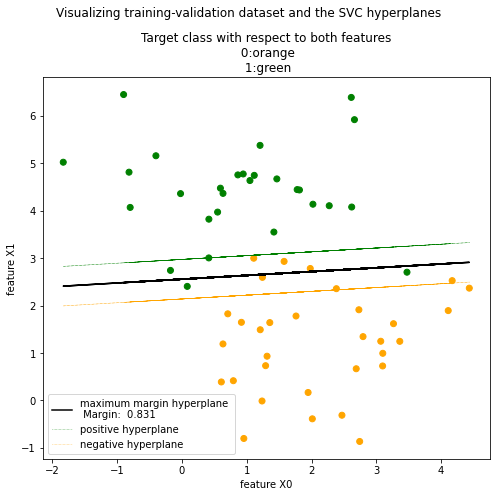

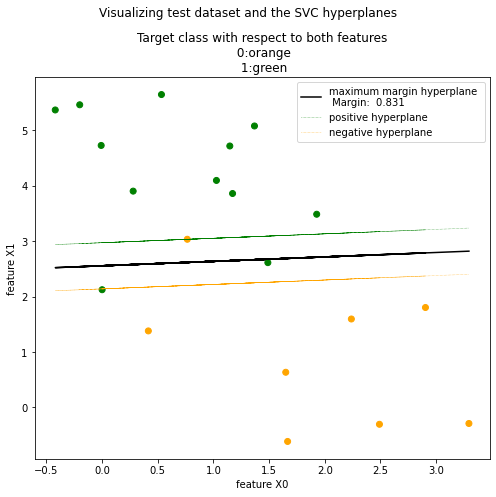

In [10]:
fig, ax = plot_data(X_train, Y_train)
ax = plot_hyperplanes(best_model, X_train, ax)
fig.suptitle("Visualizing training-validation dataset and the SVC hyperplanes")
plt.show()

fig, ax = plot_data(X_test, Y_test)
ax = plot_hyperplanes(best_model, X_test, ax)
fig.suptitle("Visualizing test dataset and the SVC hyperplanes")
plt.show()